In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
path = 'E:\\181255_RNMP_HW2\\ml-100k\\'

# Reading Datasets

## Ratings

In [3]:
df = pd.read_csv(path+'data.csv')
df

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


## Movies

In [11]:
df_movies = pd.read_csv(path+'movies.csv', encoding='latin')
df_movies

,movie_id,title,release_date,IMDb URL,genre
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,"['Animation', ""Children's"", 'Comedy']"
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,"['Action', 'Adventure', 'Thriller']"
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,['Thriller']
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,"['Action', 'Comedy', 'Drama']"
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),"['Crime', 'Drama', 'Thriller']"
...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,['Drama']
1678,1679,B. Monkey (1998),06-Feb-1998,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,"['Romance', 'Thriller']"
1679,1680,Sliding Doors (1998),01-Jan-1998,http://us.imdb.com/Title?Sliding+Doors+(1998),"['Drama', 'Romance']"
1680,1681,You So Crazy (1994),01-Jan-1994,http://us.imdb.com/M/title-exact?You%20So%20Cr...,['Comedy']


## Users

In [12]:
df_users = pd.read_csv(path+'users.csv')
df_users

,user_id,age,gender,interest,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


# Sparsity of User-Item matrix

In [5]:
def matrix_sparsity(df):
  total = len(set(df['user_id'])) * len(set(df['movie_id']))
  non_zero = df['rating'].count()
  return (1.0 - (non_zero*1.0)/total)

In [6]:
print(f"User-Item matrix sparsity {round(matrix_sparsity(df)*100, 2)}%")

User-Item matrix sparsity 93.7%


# Distributions of attributes

# Ratings

In [7]:
df['rating'].value_counts().sort_index()

1     6110
2    11370
3    27145
4    34174
5    21201
Name: rating, dtype: int64

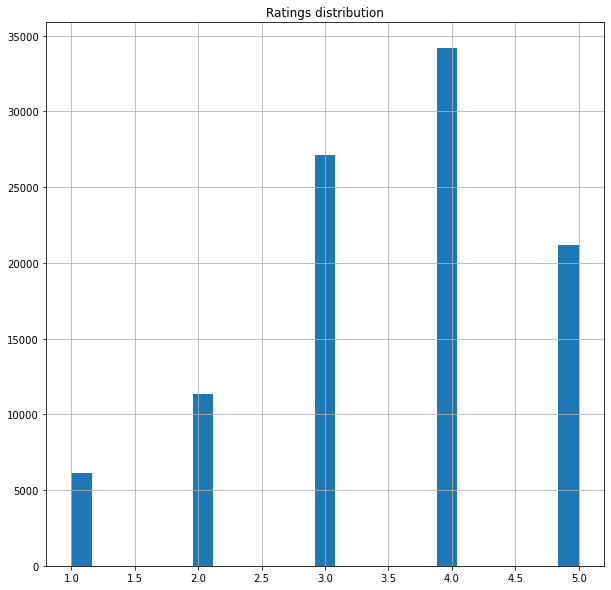

In [9]:
plt.figure(figsize=(10, 10))
df['rating'].hist(bins=25)
plt.title("Ratings distribution")
plt.show()

## Movies (movies by number of ratings)

In [13]:
df['movie_id'] = df['movie_id'].astype('int64')
df_movies['movie_id'] = df_movies['movie_id'].astype('int64')

df_group_by_movies = df.join(df_movies.set_index('movie_id'), on='movie_id')\
.groupby(['title', 'movie_id'])['rating'].count().reset_index()\
.sort_values('rating', ascending=False)
df_group_by_movies

,title,movie_id,rating
1413,Star Wars (1977),50,583
337,Contact (1997),258,509
505,Fargo (1996),100,508
1248,Return of the Jedi (1983),181,507
872,Liar Liar (1997),294,485
...,...,...,...
963,Mat' i syn (1997),1678,1
1256,Ripe (1996),1666,1
1504,Three Lives and Only One Death (1996),1507,1
1510,Tigrero: A Film That Was Never Made (1994),1561,1


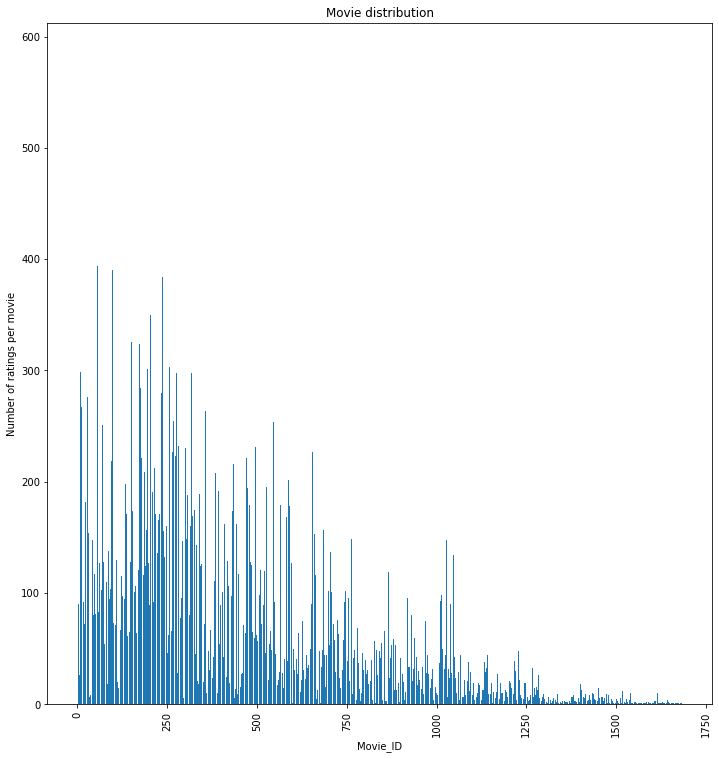

In [14]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_group_by_movies['movie_id'], df_group_by_movies['rating'])
plt.tight_layout()
plt.title("Movie distribution")
plt.xlabel("Movie_ID")
plt.xticks(rotation=90)
plt.ylabel("Number of ratings per movie")
plt.show()

# Users (users by number of ratings)

In [15]:
df['user_id'] = df['user_id'].astype('int64')
df_users['user_id'] = df_users['user_id'].astype('int64')

df_group_by_users = df.join(df_users.set_index('user_id'), on='user_id')\
.groupby(['user_id', 'age', 'gender'])['rating'].count().reset_index()\
.sort_values('rating', ascending=False)
df_group_by_users

,user_id,age,gender,rating
404,405,22,F,737
654,655,50,F,685
12,13,47,M,636
449,450,35,F,540
275,276,21,M,518
...,...,...,...,...
684,685,32,F,20
474,475,30,M,20
35,36,19,F,20
731,732,28,F,20


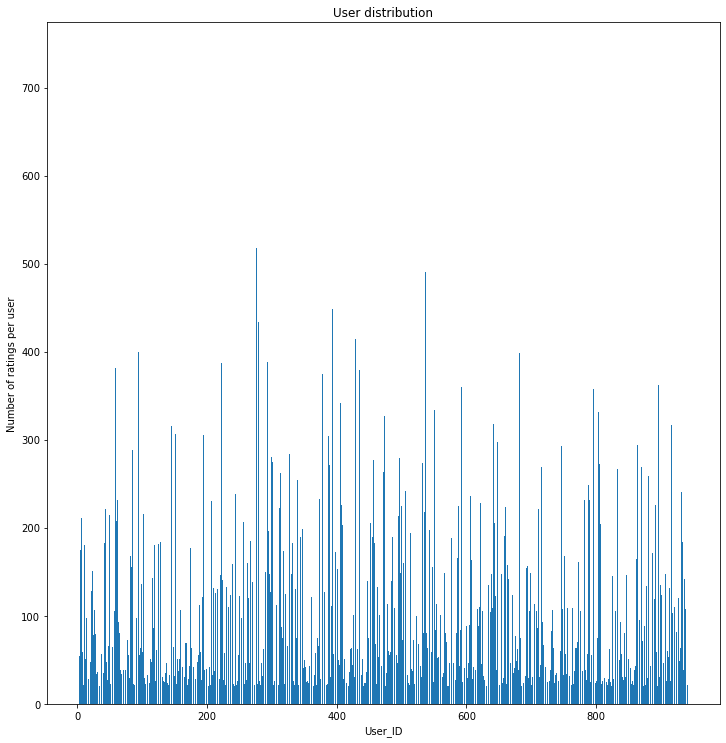

In [16]:
fig = plt.figure(figsize=(10, 10))
plt.bar(df_group_by_users['user_id'], df_group_by_users['rating'])
plt.tight_layout()
plt.title("User distribution")
plt.xlabel("User_ID")
plt.ylabel("Number of ratings per user")
plt.show()